In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.shape

(400, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FC1EA7E88>,
      dtype=object)

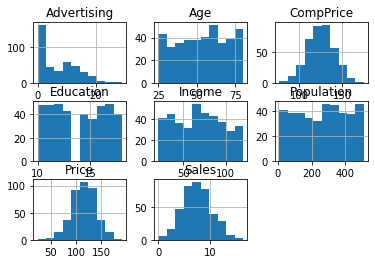

In [4]:
company.hist()

In [5]:
company.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
#Checking for maximum and minimum values to decide what will be the cut off point
company["Sales"].min()
company["Sales"].max()
company["Sales"].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [7]:
#Knowing the middle value by looking into median so that i find the middle value to check to divide data into two levels.
np.median(company["Sales"])

7.49

In [8]:
company["sales"]= "<=7.49"
company.loc[company["Sales"]>=7.49,"sales"]=">=7.49"

company["sales"].unique()
company["sales"].value_counts()

>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [9]:
#Dropping Sales column from the data 
company.drop(["Sales"],axis=1,inplace = True)

In [10]:
company.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [11]:
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [12]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [13]:
#As, the fit does not consider the String data, we need to encode the data.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = le.fit_transform(company[column_name])
    else:
        pass

In [14]:
features = company.iloc[:,0:10] 
labels = company.iloc[:,10]

In [15]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,stratify = labels)

y_train.value_counts()
y_test.value_counts()

1    60
0    60
Name: sales, dtype: int64

In [16]:
#Building the model
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
#prediction on Training data
pred_train = pd.DataFrame(model.predict(x_train))
pred_train

,0
0,1
1,0
2,1
3,1
4,0
...,...
275,1
276,0
277,1
278,1


In [19]:
#Finding Accuracy for train data
acc_train = accuracy_score(y_train,pred_train)
acc_train

1.0

In [20]:
#prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))
pred_test

,0
0,0
1,1
2,0
3,0
4,0
...,...
115,0
116,0
117,1
118,1


In [21]:
#Accuracy on test data
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.6916666666666667

In [22]:
#Visualization of decision trees
from sklearn.tree import export_graphviz
from io import StringIO 
import pydotplus

In [23]:
colnames = list(company.columns)
predictors = colnames[:10]
target = colnames[10]

In [24]:
dot_data = StringIO()
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, 
                feature_names =predictors,class_names = target, impurity = False )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [25]:
##Creating a png file of the decsion tree
graph.write_png('company.png')

True